In [1]:
  %cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/New

/content/drive/MyDrive/Colab Notebooks/Deep Learning/New


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- LDAcis 기반 Action 넘버가 매칭 된 모든 클러스터 데이터 로드

> 실습용 데이터
> - 0번째 Actor -> 7개의 Action
> - 1번째 Actor -> 4개의 Action

In [4]:
cluster = 2
df_list = []
for i in range(cluster):
  with open(f'./data/cluster_df_{i}_action.pkl', 'rb') as f:
    temp_df = pickle.load(f)
  df_list.append(temp_df)

In [5]:
df_list

[                                                 review  \
 2     프라이팬 냄새 질문프라이팬이 겉 보기엔 코팅이 살짝벗겨지고 한 2년정도 사용한 느낌...   
 5     후기~너무허술하고약해요.자꾸앞으로넘어질것같아서 오래사용못할것같아요.튼튼하게만들어서파...   
 10    이 메이커 이름이뭐죠? 프라이팬인데...이 메이커 이름이뭐죠? 프라이팬인데 도저히 ...   
 11    도마 위생나무 도마 쓰는데요. 쓰고나서 세척 후 가스불에 한번 소독이럴까... 그렇...   
 14    돈가스 요리할 때 프라이팬 보다 에어프라이어기에 하는 게 더 바삭한가요? 안녕하세요...   
 ...                                                 ...   
 4778     실리콘뒤집개이고 분명 화구에 이용하는 부엌 도구인데... 후라이팬에 닿인다고 녹아요   
 4779       도마안중근의사가 일본나라 왜 싫어했을까요?도마안중근의사가 일본나라 싫어했을까요?   
 4783  음식 별로 각각 다른 색의 도마를 사용하는 거...제가 전에... TV에서 도마를 ...   
 4786  대전서구도마네거리에서 유성구 한국과학기술원 문지캠퍼스 정문가는 버스노선좀 알려주세요...   
 4789  요리초보가 브런치나 카페메뉴 배울만한 유튜브 있음?진짜 요리 아예 아무것도 할줄모름...   
 
                                            review_clean  \
 2     프라이팬 냄새 질문프라이팬이 겉 보기엔 코팅이 살짝벗겨지고 한 2년정도 사용한 느낌...   
 5     후기너무허술하고약해요.자꾸앞으로넘어질것같아서 오래사용못할것같아요.튼튼하게만들어서파세...   
 10    이 메이커 이름이뭐죠? 프라이팬인데...이 메이커 이름이뭐죠? 프라이팬인데 도저히 ...   
 11    도마 위생나무 도마 쓰는데요. 쓰고나서 세척 후 가스불에

In [6]:
# 모든 클러스터에 대한 df를 병합!, index 새로부여
df = pd.concat(df_list, ignore_index=True)

In [19]:
pd.set_option('display.max_colwidth', None)  # 긴 문자열 출력
pd.set_option('display.max_rows', None)  # 모든 행 출력

# 필터링된 데이터프레임 출력
df[(df["cluster"] == 1) & (df["action_cluster"] == 1) & df["review_clean"].str.contains("곰팡이", case=False, na=False)]


,review,review_clean,tagged_review,vector,cluster,action_cluster
1415,나무도마에 이거 곰팡이 인가요??엔드그레인 도마구요 나무는 캄포나무에요 아직 포장도 안뜯엇는데 거뭇거뭇한게 좀 많이보이네요..,나무도마에 이거 곰팡이 인가요??엔드그레인 도마구요 나무는 캄포나무에요 아직 포장도 안뜯엇는데 거뭇거뭇한게 좀 많이보이네요..,"[나무, 도마, 거, 곰팡이, 엔드그레, 도마, 나무, 캄포나무, 포장, 뜯다, 늘다, 거뭇거뭇, 게, 보이]","[-0.0008207185, 0.0063285017, -0.0013470701, -0.0006390672, -0.0041779457, -0.0011554204, 0.0038419922, -0.0032945175, 0.0055562505, 0.0025844793, -0.0011379992, -0.0030264144, -0.0011069452, 0.0050334013, -0.0055333865, -0.0015845692, 0.0076601864, 0.011065466, -0.00030280132, -0.002608283, 0.0057935836, 0.0043211607, 0.0032378498, 0.011193083, 0.0037002699, -0.002734666, -0.005937802, 0.008102803, 0.002459222, -0.0035746207, 0.00029630752, -0.009303604, 0.002660177, 0.0027839385, -0.0053687743, 0.0054438515, 0.0054256967, -0.0069716154, -0.0053133797, 0.0027889956, 0.0045821033, 0.0014190662, 0.0049413526, -0.0033489012, 0.0035981142, -0.0035313147, 0.0012671611, 0.0015556758, 0.003311238, -0.0012728212, -0.0022180518, -0.0026093493, 0.0016215381, -0.0015044811, 0.008196827, -0.0033583448, -0.0046180533, 0.00023936463, 0.00407067, 0.002900598, -0.0008042904, -0.0034469494, -0.009217607, -0.008343326, -0.0034860694, 0.0055378354, -0.005738296, -0.0022801224, -0.0011195444, -0.006623083, -0.001752584, 0.0035076914, -6.7742214e-05, -0.0060104234, 0.006547998, 0.0023873115, 0.0011471371, -0.00799635, 0.00071913784, 0.0032673376, 0.0034909565, 0.0031114242, -0.0051776906, 0.0057319733, -0.0056292103, 0.0006840057, -0.0008009451, 0.0020970707, 0.0009586554, 0.0006812156, -0.0018192787, -0.008204987, 0.00084499526, -0.00503672, 0.005040586, 0.002904953, -0.0028817772, -0.0031051931, -0.0014324248, -0.005186725, ...]",1,1
1540,나무도마 사진좀 봐주세요선물받은 도마인데 곰팡이인가요?,나무도마 사진좀 봐주세요선물받은 도마인데 곰팡이인가요?,"[나무, 도마, 사진, 보다, 선물, 받다, 도마, 곰팡이]","[-0.0031328378, 0.005949758, 0.0030947644, 0.0031338064, -0.010718087, 0.001279261, 0.0037167491, -0.0020873295, -0.0013132944, 0.0011756655, 0.0034669293, 0.00080734096, 0.008820796, -0.0075764977, -0.0033017532, -0.007969427, -0.0013425642, 0.009369366, -0.0008009984, -0.0035591526, 0.0049624043, 0.012275704, -0.004289313, 0.0067866677, 0.0043350505, -0.0020359636, -2.4955516e-06, 0.008663921, -0.003263877, 0.0070769866, 0.005218782, -0.007931215, 0.0071886317, -0.00026554978, -0.0013337788, 0.0008092744, -0.0027152135, -0.0008266341, -0.0009458187, -0.0020028488, -0.005251808, 0.0027433105, -0.00042745407, 0.0068324883, 0.005329847, 0.0041719945, -0.00047185126, -0.00046583146, -0.0010839353, -0.009095886, 0.0044928407, 0.0030435415, -0.0059738313, -0.0017546208, -0.0005082249, -0.0016133795, -0.0023354194, -0.0030793631, 9.341905e-05, 0.0044137794, 0.003343248, 0.0021816338, -0.005521412, -0.00094742613, 0.0036082768, -0.0006495922, -0.0026841033, 0.0052418546, 0.0039944197, -0.004167049, -0.005458744, -0.0005348354, -0.00089148426, -0.0014092857, -0.00017994604, -0.00036185049, -0.0005830465, 0.0029715335, 0.000824754, -0.0040714033, -0.0018155312, 0.0038890948, -0.0038267362, -0.004731141, 0.004934469, 0.0017554762, -0.004926295, -0.0031712723, -0.0067231683, 0.0075311493, -0.009018213, 0.0045218533, 0.0046835532, 0.002004957, 0.001526224, -0.0034864356, -0.0005636701, 0.005810277, 0.004730371, -0.0006130431, ...]",1,1
1551,나무도마 질문이요~나무도마를 세트로 여러개 선물 받았는데 박스에 그대로 뒀더니 곰팡이가 폈어요. 쓸 수 있을까요?? 이런 경우에 어떻게 관리하면 되는지도 알려주세요~~,나무도마 질문이요나무도마를 세트로 여러개 선물 받았는데 박스에 그대로 뒀더니 곰팡이가 폈어요. 쓸 수 있을까요?? 이런 경우에 어떻게 관리하면 되는지도 알려주세요,"[나무, 도마, 질문, 나무, 도마, 세트, 개, 선물, 받다, 박스, 그대로, 두다, 곰팡이, 피다, 쓸다, 수, 이렇다, 경우, 관리, 알다]","[-0.0044499184, -0.0006798074, 0.0077341776, 0.00561769, -0.011630416, -0.0018311526, 0.0048080417, 0.00047839357, 0.0035614436, -0.007193422, -0.0011892898, -0.002557423, 0.007819019, -0.006591584, 0.002625654, -0.0017886203, -0.0047302647, 0.0027012709, 0.00063155394, 0.0013886209, 0.004155933, 0.0086962, -0.0021525165, 0.006070623, 0.0006489821, 0.0055232146, 0.0004707692, -0.0006728812, -0.0040874784, -0.0025572828, -0.0011169255, -0.003622062, -0

# 1. 만족도 계산 (satisfaction)
- 1.1 감성사전 불러오기
- 1.2 리뷰들의 각 토큰과 일치하는 감성 점수 구하는 함수 정의
- 1.3 감성 점수 구하기
- 1.4 Actor의 각 Action 별 감성점수 계산 후 정규화 -> 만족도

### 1.1 감성사전 불러오기
- KNU 한국어 감성사전
- http://dilab.kunsan.ac.kr/knusl.html

In [ ]:
import json  # JSON 파일을 읽고 쓰기 위한 도구

In [ ]:
with open('./data/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
  sent_dict = json.load(f)

In [ ]:
print(sent_dict)
# {'word': 원래 단어 , 'word_root': 단어의 표준형태, 'polarity': 감성극성(ex.1 은 긍정, -1은 부정)}

[{'word': '(-;', 'word_root': '(', 'polarity': '1'}, {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'}, {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'}, {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'}, {'word': '(^^*', 'word_root': '(', 'polarity': '1'}, {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'}, {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'}, {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'}, {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'}, {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'}, {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'}, {'word': ')-:', 'word_root': ')', 'polarity': '-1'}, {'word': '*^^*', 'word_root': '*', 'polarity': '1'}, {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'}, {'word': ':(', 'word_root': ':', 'polarity': '1'}, {'word': ":'-(", 'word_root': ':', 'polarity': '1'}, {'word': ':-(', 'word_root': ':', 'polarity': '1'}, {'word': ':)', 'word_root': ':', 'polarity': '-1'}, {'word': 

In [ ]:
len(sent_dict)

14854

### 1.2 리뷰들의 각 토큰과 일치하는 감성 점수 구하는 함수 정의


In [ ]:
len(df)

4418

In [ ]:
# Test -> 각 리뷰 별로 단어 리스트(df["tagged_review"]) 중에 감성 사전에 매칭되는 단어(토큰)가 있는 경우 polarity  부여
result_list = []

for token in df["tagged_review"].iloc[0]:
  for sent_info in sent_dict:
    if token == sent_info["word"]: # 감성사전에 해당 token이 매칭되는가??
      result_list.append((sent_info["polarity"],sent_info["word"]))
print(result_list)


[('-2', '울다'), ('1', '받다'), ('-1', '이상하다'), ('-1', '이상하다')]


In [ ]:
# 사용자 함수 정의
def sentiment_score(sent_dict, review_token_list): # 감성사전, 리뷰의 토큰 리스트
  result_list = [] #(감점점수, 단어)를 담아둘 리스트

  for token in review_token_list:
    for sent_info in sent_dict:
      if token == sent_info["word"]: # 감성사전에 해당 token이 매칭되는가??
        result_list.append((sent_info["polarity"],sent_info["word"]))
  return result_list

In [ ]:
# 함수 테스트
sentiment_score(sent_dict, df["tagged_review"].iloc[0])

[('-2', '울다'), ('1', '받다'), ('-1', '이상하다'), ('-1', '이상하다')]

In [ ]:
! pip install konlpy

In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

In [ ]:
okt.tagset

# Adjective(형용사) : 명사의 성질(또는 상태)를 나타내는 품사 (ex. 좋다, 아름답다 등)
# Verb(동사) : 행위나 상태를 나타내는 품사 (ex 가다, 먹다 ,보다 ,하다 등)
# Adverb(부사) : 동사, 형용사, 전체 문장을 수식하는 품사 (ex. 천천히, 빨리, 매우 등)
# Exclamation(감탄사) : 감탄, 놀라움, 분노, 기쁨 등 감정을 독립적으로 표현하는 품사(ex. 와!, 아!, 우와! 등)

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
# 품사 기준으로 토큰화 하는 함수
def okt_pos_taggind(text):
  # 품사태깅 + 어간 추출 + 정규화
  pos_words = okt.pos(text, stem = True, norm = True)
  tagged_list = []  # 감정 점수 계산에 활용될 단어들을 담아둘 리스트
  # 품사가 형용사, 동사, 부사, 감탄사 중에 하나라면 -> word를 추출
  for word, pos in pos_words:
    if pos in ["Adjective", "Verb", "Adverb", "Exclamation"]:
      tagged_list.append(word)
  return tagged_list

- 감성 점수 계산

In [ ]:
from tqdm.auto import tqdm

In [ ]:
sentiment = []

for review in tqdm(df["review"]):
  pos_tagged = okt_pos_taggind(review) # 감정에 특화 된 품사 기준으로 재토큰화
  score = sentiment_score(sent_dict, pos_tagged) # 추출된 단어리스트를 기반으로 감정 점수 계산
  sentiment.append(score)

  0%|          | 0/4418 [00:00<?, ?it/s]

In [ ]:
len(sentiment)

4418

- 각 리뷰에 대한 평균 감정점수 구하기

In [ ]:
import numpy as np

In [ ]:
# 각 리뷰의 감성 점수(평균값)를 저장할 리스트
avg_sentiment_scores = []
for sentiment_result in sentiment:
   # 현재 리뷰의 모든 감성 점수를 정수형으로 형변환
   scores = [ int(result[0]) for result in sentiment_result]

   # 점수가  있으면 평균을 계산하고, 없으면 0을 저장
   avg_score = np.mean(scores) if scores  else 0
   avg_sentiment_scores.append(avg_score)

In [ ]:
print(len(avg_sentiment_scores))
print(avg_sentiment_scores[:5])

4418
[-0.75, 0.0, 0, 2.0, 0]


- df에 평균 감정 점수 추가

In [ ]:
df["sentiment_score"] = avg_sentiment_scores

In [ ]:
df.head(3)

,review,review_clean,tagged_review,vector,cluster,action_cluster,sentiment_score
0,프라이팬 냄새 질문프라이팬이 겉 보기엔 코팅이 살짝벗겨지고 한 2년정도 사용한 느낌...,프라이팬 냄새 질문프라이팬이 겉 보기엔 코팅이 살짝벗겨지고 한 2년정도 사용한 느낌...,"[프라이팬, 냄새, 질문, 프라이팬, 겉, 보기, 코팅, 살짝, 벗겨지다, 사용, ...","[-0.022904845, -0.012947037, -0.027999451, -0....",0,4,-0.75
1,후기~너무허술하고약해요.자꾸앞으로넘어질것같아서 오래사용못할것같아요.튼튼하게만들어서파...,후기너무허술하고약해요.자꾸앞으로넘어질것같아서 오래사용못할것같아요.튼튼하게만들어서파세...,"[후기, 허다, 술, 약하다, 자꾸, 앞, 넘어지다, 사용, 튼튼하다, 만들다, 파...","[-0.0052488633, -0.011257982, -0.01746044, -0....",0,1,0.00
2,이 메이커 이름이뭐죠? 프라이팬인데...이 메이커 이름이뭐죠? 프라이팬인데 도저히 ...,이 메이커 이름이뭐죠? 프라이팬인데...이 메이커 이름이뭐죠? 프라이팬인데 도저히 ...,"[메이커, 이름, 뭐, 프라이팬, 메이커, 이름, 뭐, 프라이팬, 도저히, 읽다]","[-0.011154709, -0.008348352, -0.01236095, -0.0...",0,5,0.00


## 1.4 각 Actor에 대한 Action 별 감정 점수 계산 후 정규화 -> 만족도

In [ ]:
action_setiments={}
for actor in df["cluster"].unique():
  actor_df = df[df["cluster"] == actor]

  for action in actor_df["action_cluster"].unique():  # 각 action 별 순회

    # 현재 액션에 해당되는 리뷰들의 감정 점수값을 지정
    action_score = actor_df[actor_df["action_cluster"] == action]["sentiment_score"]

    #평균 계산
    action_score_mean = np.mean(action_score)

    # 계산된 평균 감정 점수와 각 액터 및 액션을 딕셔너리에 저장
    action_setiments[f"Actor{actor}_Action{action}"] = action_score_mean

In [ ]:
# 키값만 저장 -> 기회영역 시각화 할 때 사용
actions = action_setiments.keys()

In [ ]:
action_setiments

{'Actor0_Action4': 0.029139818195117715,
 'Actor0_Action1': -0.18315398886827455,
 'Actor0_Action5': 0.20227969348659006,
 'Actor0_Action3': 0.2658698156682028,
 'Actor0_Action2': -0.19493593238822246,
 'Actor0_Action6': 0.15187122706353479,
 'Actor1_Action2': -0.4564219230449597,
 'Actor1_Action7': 0.13580481622306717,
 'Actor1_Action4': 0.228058540678349,
 'Actor1_Action3': -0.012114244839566728,
 'Actor1_Action5': -0.22414178100618776,
 'Actor1_Action1': 0.4650922073252171,
 'Actor1_Action6': -0.06554147371841744,
 'Actor1_Action8': 0.20434343434343435}

- 감정점수 정규화(스케일링) 수행

In [ ]:
# action_setiments['Actor1_Action1'] = 0.1050922073252171
# action_setiments['Actor1_Action3'] = -0.100424483956672

In [ ]:
action_setiments

{'Actor0_Action4': 0.029139818195117715,
 'Actor0_Action1': -0.18315398886827455,
 'Actor0_Action5': 0.20227969348659006,
 'Actor0_Action3': 0.2658698156682028,
 'Actor0_Action2': -0.19493593238822246,
 'Actor0_Action6': 0.15187122706353479,
 'Actor1_Action2': -0.4564219230449597,
 'Actor1_Action7': 0.13580481622306717,
 'Actor1_Action4': 0.228058540678349,
 'Actor1_Action3': -0.100424483956672,
 'Actor1_Action5': -0.22414178100618776,
 'Actor1_Action1': 0.1050922073252171,
 'Actor1_Action6': -0.06554147371841744,
 'Actor1_Action8': 0.20434343434343435}

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 1. 정규화 할 데이터(액션별 평균감정점수) 가져오기
raw_scores = list(action_setiments.values())
# 2. 형변환 -> 2차원 배열로 형변환 (MinMaxScaler가 요구하는 차원)
scores_array = np.array(raw_scores).reshape(-1 ,1)
# 3. 스케일러 초기화
scaler = min_max_scaler = MinMaxScaler(feature_range= (0,10)) # 끝값 포함!!!
# 4. 스케일링 수행
scaled_scores = scaler.fit_transform(scores_array)

# 5. 스케일링 결과를 1차원 리스트로 형변환(소수점 4자리까지 반올림)
scaled_scores_list = scaled_scores.flatten().tolist()
scaled_scores_list_round = [round(score, 4) for score in scaled_scores_list]

# 6. 스케일링 된 점수를 기존 딕셔너리(action_sentiments)에 업데이트
for key,new_score in zip(action_setiments.keys(), scaled_scores_list_round):
  action_setiments[key] = new_score

# 7. df화
action_summary_df = pd.DataFrame(action_setiments.items(),columns = ["Action","satisfaction"])

# 2. 중요도(Importance)
- importance = (빈도수/전체 빈도수) *100
- 2.1 중요도 점수 구하기 -> 전체 토픽에 대한 비중
- 2.2 중요도 점수에 대한 정규화(스케일링)

### 2.1 중요도 점수 구하기

In [ ]:
# 모든 리뷰에 대해서 "Actor0_Action0" 형태의 문자열을 생성

actor_action_labels = []
for actor, action in zip(df["cluster"], df["action_cluster"]):
  actor_action_labels.append(f"Actor{actor}_Action{action}")

In [ ]:
# 빈도수 계산
from collections import Counter

In [ ]:
label_frequency = Counter(actor_action_labels)
label_frequency

Counter({'Actor0_Action4': 217,
         'Actor0_Action1': 350,
         'Actor0_Action5': 145,
         'Actor0_Action3': 248,
         'Actor0_Action2': 262,
         'Actor0_Action6': 130,
         'Actor1_Action2': 573,
         'Actor1_Action7': 263,
         'Actor1_Action4': 313,
         'Actor1_Action3': 466,
         'Actor1_Action5': 295,
         'Actor1_Action1': 618,
         'Actor1_Action6': 373,
         'Actor1_Action8': 165})

In [ ]:
# label_frequency['Actor1_Action1'] = 553

In [ ]:
label_frequency

Counter({'Actor0_Action4': 217,
         'Actor0_Action1': 350,
         'Actor0_Action5': 145,
         'Actor0_Action3': 248,
         'Actor0_Action2': 262,
         'Actor0_Action6': 130,
         'Actor1_Action2': 573,
         'Actor1_Action7': 263,
         'Actor1_Action4': 313,
         'Actor1_Action3': 466,
         'Actor1_Action5': 295,
         'Actor1_Action1': 618,
         'Actor1_Action6': 373,
         'Actor1_Action8': 165})

In [ ]:
# 전체 빈도수 계산
total_count = sum(label_frequency.values())
total_count

4418

In [ ]:
# 중요도 계산
# 중요도 = (해당 action의 빈도수 / 전체 빈도수) * 100
importance_dict = { label: (count/total_count)*100 for label, count in label_frequency.items()}
importance_dict

{'Actor0_Action4': 4.911724762335899,
 'Actor0_Action1': 7.922136713444998,
 'Actor0_Action5': 3.282028066998642,
 'Actor0_Action3': 5.613399728383884,
 'Actor0_Action2': 5.930285196921684,
 'Actor0_Action6': 2.942507922136713,
 'Actor1_Action2': 12.969669533725666,
 'Actor1_Action7': 5.952919873245813,
 'Actor1_Action4': 7.0846536894522405,
 'Actor1_Action3': 10.547759167043912,
 'Actor1_Action5': 6.6772295156179275,
 'Actor1_Action1': 13.988229968311453,
 'Actor1_Action6': 8.442734268899954,
 'Actor1_Action8': 3.7347215934812135}

In [ ]:
# 1. 정규화 할 데이터(액션별 정규화 이전의 중요도) 가져오기

raw_scores = list(importance_dict.values())

# 2. 형변환 -> 2차원 배열로 형변환(MinMaxScaler가 요구하는 차원)

scores_array = np.array(raw_scores).reshape(-1, 1)

# 3. 스케일러 초기화

scaler = MinMaxScaler(feature_range = (0, 10)) # 끝값 포함!

# 4. 스케일링 수행

scaled_scores = scaler.fit_transform(scores_array)

# 5. 스케일링 결과를 1차원 리스트로 형변환(소수점 4자리까지 반올림)

scaled_scores_list = scaled_scores.flatten().tolist()

scaled_scores_list_round = [round(score, 4) for score in scaled_scores_list]


# 6. 스케일링 된 점수를 기존 딕셔너리(importance_dict)에 업데이트

for key, new_score in zip(importance_dict.keys(), scaled_scores_list_round) :
    importance_dict[key] = new_score
importance_dict

{'Actor0_Action4': 1.7828,
 'Actor0_Action1': 4.5082,
 'Actor0_Action5': 0.3074,
 'Actor0_Action3': 2.418,
 'Actor0_Action2': 2.7049,
 'Actor0_Action6': 0.0,
 'Actor1_Action2': 9.0779,
 'Actor1_Action7': 2.7254,
 'Actor1_Action4': 3.75,
 'Actor1_Action3': 6.8852,
 'Actor1_Action5': 3.3811,
 'Actor1_Action1': 10.0,
 'Actor1_Action6': 4.9795,
 'Actor1_Action8': 0.7172}

In [ ]:
# 7. df에 추가
action_summary_df["importance"] = list(importance_dict.values())
action_summary_df

,Action,satisfaction,importance
0,Actor0_Action4,6.7225,1.7828
1,Actor0_Action1,3.7833,4.5082
2,Actor0_Action5,9.1196,0.3074
3,Actor0_Action3,10.0000,2.4180
4,Actor0_Action2,3.6202,2.7049
5,Actor0_Action6,8.4217,0.0000
6,Actor1_Action2,0.0000,9.0779
7,Actor1_Action7,8.1993,2.7254
8,Actor1_Action4,9.4765,3.7500
9,Actor1_Action3,4.9287,6.8852


# 3. 기회 점수(Opportunity)
- 3.1 기회점수 계산
- 3.2 기회 영역 시각화
- 만약에 고객이 어떤 행동을 중요하게 여기지만, 그에 비해 만족도가 낮다면 -> 그 차이가 클수록 고객에게 개선의 여지가 많다(가치가 높다)는 걸 의미하는 분석 방법

In [ ]:
# 기회 점수 계산 함수 정의
def opportunity_score(satisfaction, importance):
  return importance + max(satisfaction - importance,0)

In [ ]:
# 계산
opportunity_list=[]
for s, i in zip(action_summary_df["satisfaction"], action_summary_df["importance"]):
  opportunity_list.append(opportunity_score(s,i))
opportunity_list

[6.7225,
 4.5082,
 9.1196,
 10.0,
 3.6202,
 8.4217,
 9.0779,
 8.1993,
 9.4765,
 6.8852,
 3.3811,
 10.0,
 5.4117,
 9.1482]

In [ ]:
# df에 추가
action_summary_df["opportunity_score"] = opportunity_list
action_summary_df

,Action,satisfaction,importance,opportunity_score
0,Actor0_Action4,6.7225,1.7828,6.7225
1,Actor0_Action1,3.7833,4.5082,4.5082
2,Actor0_Action5,9.1196,0.3074,9.1196
3,Actor0_Action3,10.0000,2.4180,10.0000
4,Actor0_Action2,3.6202,2.7049,3.6202
5,Actor0_Action6,8.4217,0.0000,8.4217
6,Actor1_Action2,0.0000,9.0779,9.0779
7,Actor1_Action7,8.1993,2.7254,8.1993
8,Actor1_Action4,9.4765,3.7500,9.4765
9,Actor1_Action3,4.9287,6.8852,6.8852


In [ ]:
# 저장
action_summary_df.to_csv("./data/sent_impo_oppo_score.csv", index = False)

- 기회영역 시각화

In [ ]:
# 만족도, 중요도, 액션이름(라벨) 가져옴
satisfaction = action_summary_df["satisfaction"]
importance = action_summary_df["importance"]
actions = action_summary_df["Action"]
actions # actor0 -> 7 개, actor1 -> 4개

,Action
0,Actor0_Action4
1,Actor0_Action1
2,Actor0_Action5
3,Actor0_Action3
4,Actor0_Action2
5,Actor0_Action6
6,Actor1_Action2
7,Actor1_Action7
8,Actor1_Action4
9,Actor1_Action3


In [ ]:
# 각 액션마다 무작위 색상을 생성
colors = np.random.rand(len(actions),3)
colors

array([[0.59678374, 0.03701677, 0.04385477],
       [0.96252882, 0.50156572, 0.21823147],
       [0.15511241, 0.6901864 , 0.35907799],
       [0.93147928, 0.20657897, 0.49575048],
       [0.86371909, 0.98838899, 0.35000748],
       [0.84291925, 0.39228068, 0.39250793],
       [0.583217  , 0.86347257, 0.97914254],
       [0.17102799, 0.87978908, 0.55062294],
       [0.06783646, 0.43143949, 0.74250686],
       [0.17738955, 0.15569116, 0.90826069],
       [0.41579904, 0.87538484, 0.21874335],
       [0.45036265, 0.47751197, 0.58045544],
       [0.25539748, 0.89590364, 0.51405667],
       [0.51626569, 0.56506403, 0.00547108]])

In [ ]:
import matplotlib.pyplot as plt

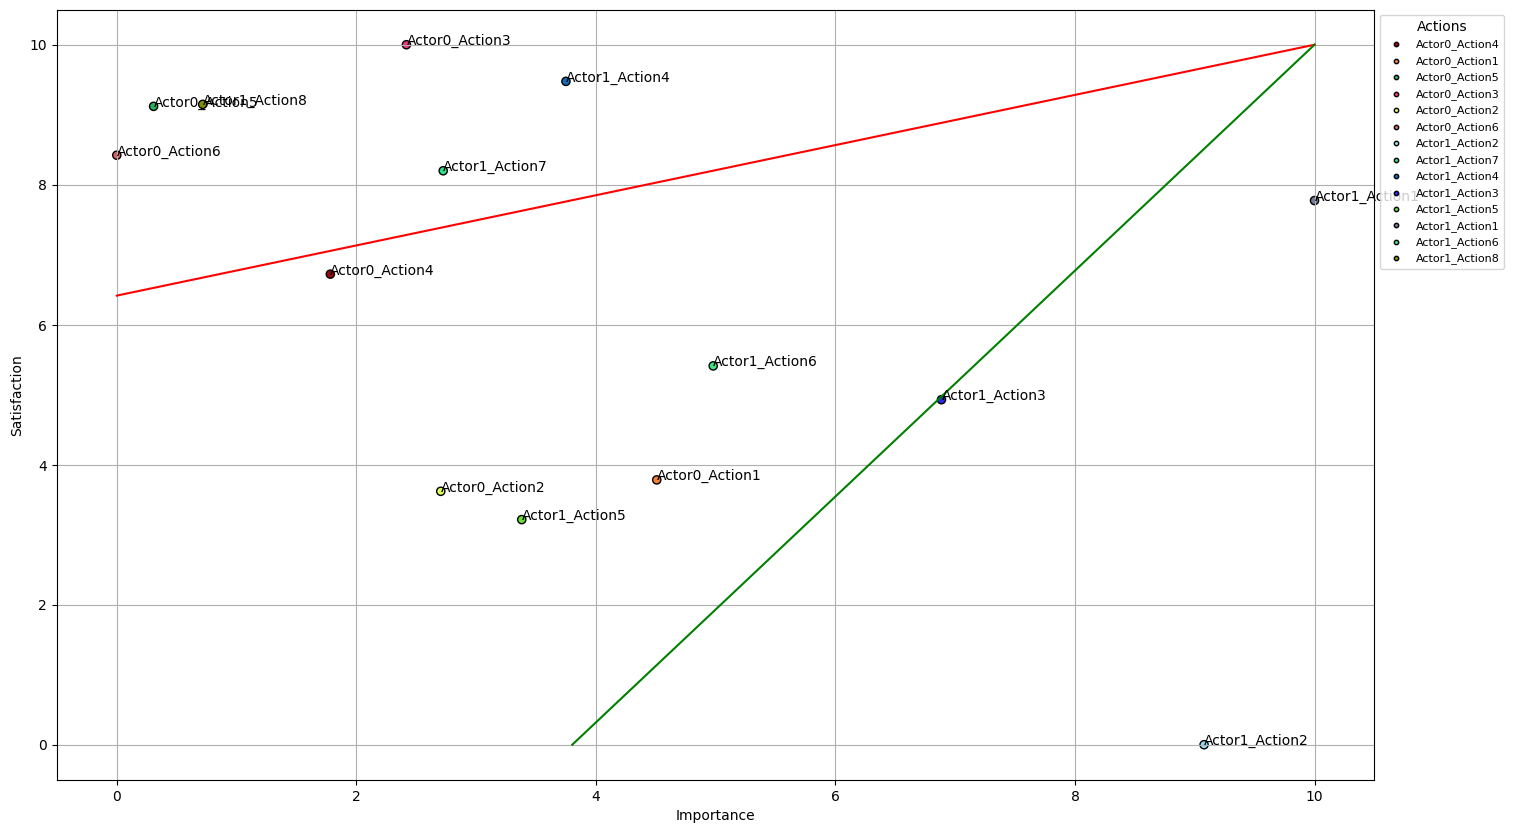

In [ ]:
plt.figure(figsize = (17, 10))

# 산점도
plt.scatter(
    importance,
    satisfaction,
    s = 35,          # 마커 크기
    c = colors,      # 각 마커의 색상(임의의 랜덤값)
    edgecolors = 'black' # 마커의 테두리

)

plt.xlabel('Importance')     # x축 이름
plt.ylabel('Satisfaction')   # y축 이름


# 첫번째 영역 분할 선
xdata = [0, 10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'r')

# 두 번째 영역 분할 선
x_data = [importance.mean(), 10]
y_data = [0, 10]
plt.plot(x_data, y_data, 'g')

# 각 액션에 이름(텍스트) 추가
for i, action in enumerate(actions):
    plt.text(
        importance[i], satisfaction[i],
        action,
        fontsize = 10,
        ha = 'left' # 왼쪽 정렬
    )

# 범례 표시를 위한 빈 산점도 그리기
for i, action in enumerate(actions):
    plt.scatter(
        [], [],
        s = 10,
        c = [colors[i]],
        label = action,
        edgecolors = 'black'
    )

# 범례 표시
plt.legend(
    title = 'Actions',
    fontsize = 8,
    title_fontsize = '10',
    loc = 'upper left',   # 범례들이 왼쪽 상단에 위치
    bbox_to_anchor=(1, 1) # 범례를 플롯 외부 오른쪽 상단에 고정
)

plt.grid()

# 그래프를 저장한다
plt.savefig(
    './data/Opportunity_area.png',
    dpi = 300,
    bbox_inches = 'tight'  # 여백을 최소화
)
plt.show()
